# Autoregressive Models (AR)

## O que são??

Modelos autorregressivos predizem valores como uma função dos _p_ valores anteriores

Por exemplo, o valor de y no instante t com base apenas em um valor passado: __AR(1)__

$y_t = \mu+\phi_1*y_{t-1}+\phi_2*y_{t-2}+e_t$

Recomendado para séries que não apresentam tendências ou sazonalidade, contudo a sazonalidade pode ser enviada como parâmetro na criação do modelo AutoReg, o que melhora bastante a previsão em caso de séries sazonais.

## Aplicando AR no dataset de passageiros aéreos

In [2]:
#Importando bibliotecas básicas

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [44]:
# Lendo arquivo CSV contendo data e número de passageiros no vôo
df = pd.read_csv('Datasets/AirPassengers.csv')

#Definindo as datas como índice
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df = df.rename(columns={"#Passengers":"Passengers"})
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Separando os dados de treino e teste

A seguinte função irá dividir oa quantidade de passageiros por mêm em 75% de registros de treino e 25% de teste

In [45]:
def train_test(data):
    last_train = int(len(df)*0.75) #última posição de treino
    train, test = data[0:last_train], data[last_train:]
    return train, test

In [46]:
train, test = train_test(df)

### Análise de correlação

A autocorrelação se trata da relação entre um valor e outro, ao plotar a autocorrelação o eixo X informa o "espaço" entre os dados. O eixo Y é o valor da correlação que varia entre 1 (muito forte) e -1 (inversa), em Y = 0 a correlação é nula. Ou seja a correlação entre o conjunto de dados em um intervalo de X dados.

In [8]:
#importando bibliotecas para visualização da autocorrelação
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

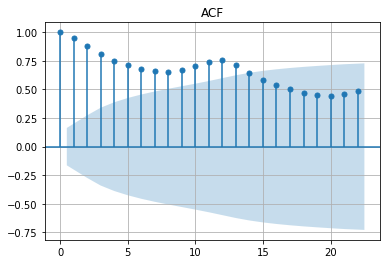

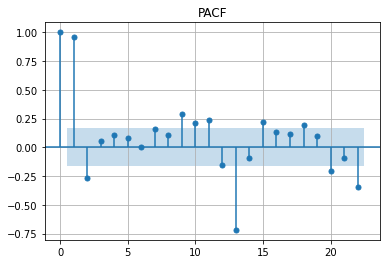

In [6]:
#Plotando função de autocorrelação
plot_acf(df, title = 'ACF')
plt.grid()

#Plotando função de autocorrelação parcial
plot_pacf(df, title = 'PACF')
plt.grid()

plt.show()

### Criando modelo AR

In [47]:
#Importando auto regressor
from statsmodels.tsa.ar_model import AutoReg

l = 14

#Criando modelo AR com os dados de df, quantidade l de lags, configuração sazonal e tendência de variação ao longo do tempo
ar_model = AutoReg(endog = train, lags = l, trend = 't', seasonal = True, old_names = False)

#treinando o modelo 
ar_fit = ar_model.fit()

#Fazendo predições para os três últimos anos
predictions = ar_fit.predict(start=datetime(1958, 1, 1), end=datetime(1960, 12, 1))

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


### Visualizando e valiando resultados

In [36]:
#Criando dataframe para armazenar os valores reais e os preditos

df_res = pd.DataFrame()
df_res['Real'] = test['Passengers']
df_res['Predict'] = predictions

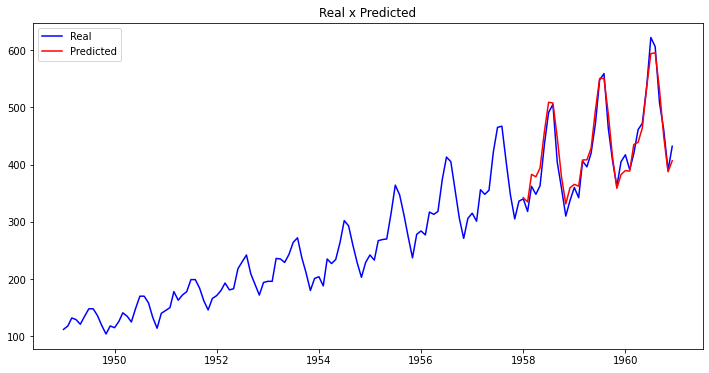

In [37]:
#Plotando todos valores reais e os preditos

plt.figure(figsize=(12,6))

plt.plot(df.index, df['Passengers'], color='blue')
plt.plot(df_res.index, df_res['Predict'], color='red')

plt.legend(['Real', 'Predicted'])
plt.title('Real x Predicted')

plt.show()

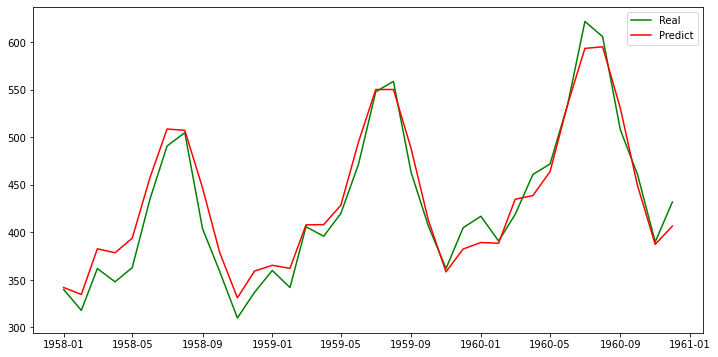

In [38]:
#Plotando os valores reais da mesma época que os preditos

plt.figure(figsize=(12,6))

plt.plot(df_res.index, df_res['Real'], color='green')
plt.plot(df_res.index, df_res['Predict'], color='red')

plt.legend(['Real', 'Predict'])

plt.show()

In [39]:
#Medindo métrica de erros

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18.931


### Avaliando melhor lag

In [ ]:
lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36] #Até 3 anos
error = []

for l in lags:
    ar_model = AutoReg(endog = train, lags = l, trend = 't', seasonal = True, old_names = False)
    ar_fit = ar_model.fit()
    predictions = ar_fit.predict(start=datetime(1958, 1, 1), end=datetime(1960, 12, 1))
    rmse = sqrt(mean_squared_error(test, predictions))
    error.append(rmse)

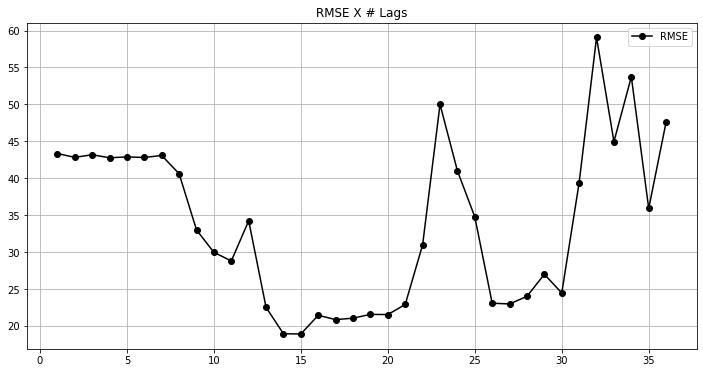

In [41]:
plt.figure(figsize=(12,6))

plt.title('RMSE X # Lags')

plt.plot(lags, error, color='black', marker='o')

plt.legend(['RMSE'])

plt.grid()
plt.show()

Como visto no gráfico acima a melhor quantidade de lags é aparentemente 14

#### Prevendo futuros valores

In [ ]:
l = 14
ar_model = AutoReg(endog = train, lags = l, trend = 't', seasonal = True, old_names = False)
ar_fit = ar_model.fit()

#Fazendo predições para os três últimos anos
predictions = ar_fit.predict(start=datetime(1960, 1, 1), end=datetime(1962, 12, 1))

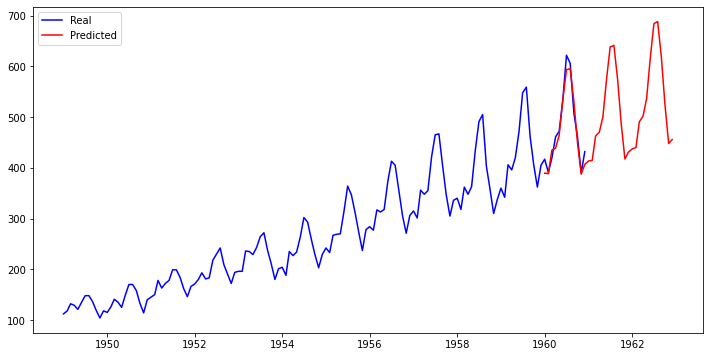

In [43]:
#Plotando todos valores reais e os futuros

plt.figure(figsize=(12,6))

plt.plot(df.index, df['Passengers'], color='blue')
plt.plot(predictions, color='red')

plt.legend(['Real', 'Predicted'])

plt.show()

## Conclusão

O modelo AR pode ser utilizado para previsão temporal, apresentou resultados satisfatórios em pouco tempo. É possível utilizar técnicas de aprimoramento como transformações para diminuir o erro das previsões.

Vale ressaltar que o sucesso do modelo treinado se deve principalmente ao parâmetro "sazonal"